In [1]:
# HyperionDev Data Science Bootcamp, Dec 5, 2022 cohort
# Task 51 Compulsory Task 1
# Author: Zsolt Pal, Feb 26, 2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
arrests_df = pd.read_csv('UsArrests.csv', index_col=0)

 By making the first column (which contains the state names) the index column, we can easily reference each state in the analysis without having to convert or exclude it.

Since the state names are not numerical values, we cannot use them directly in mathematical operations or analysis. However, by making them the index column, we can still associate each state with its corresponding values for the numerical variables in the dataset.

In [4]:
print('Data:')
print(arrests_df.head())
# Preprocess data

# check if there are missing values
print("")
print(arrests_df.isnull().sum())
# check if there are non-numerical features
print("")
print(arrests_df.info())

Data:
            Murder  Assault  UrbanPop  Rape
City                                       
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


Dataframe is error free and consistent.

In [5]:
arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


##### Data needs scaling

Before we can perform PCA on the dataset, we need to standardize the data so that each variable has a mean of zero and a standard deviation of one. This will ensure that each variable is on the same scale and has equal importance in the analysis. We can use the StandardScaler class from the sklearn library to do this:

In [6]:
scaler = StandardScaler()
arrests_df_scaled = scaler.fit_transform(arrests_df)

##### PCA Report

Now that we have preprocessed the data, we can perform PCA on the dataset. We can use the PCA class from the sklearn library to do this:

In [7]:
# Fit PCA to the scaled data
pca = PCA(n_components=2)
pca.fit(arrests_df_scaled)

PCA(n_components=2)

However to choose the optimal number of principal components, we need to perform some additional analysis or transformations on the fitted PCA object before transforming the original data:

##### Finding the optimal number of PCA

Examining the explained variance ratio:
After fitting the PCA object to the scaled data, we can examine the explained_variance_ratio_ attribute to see how much variance is explained by each principal component. We could plot this as a scree plot or bar plot to visually assess the importance of each principal component in the data. The thought however also occurs to me that we could use a grid search to find the optimal number of PC components - use a list of numbers for the n_components parameter for PCA, plot the variances and see which setting of that param would be ideal.

###### Method A: GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
# Define a range of candidate values for n_components
param_grid = {'n_components': [1, 2, 3, 4]}

# Create a PCA object
pca_grid = PCA()

# Use grid search to find the optimal value of n_components
grid = GridSearchCV(pca_grid, param_grid=param_grid)
grid.fit(arrests_df_scaled)

# Print the best value of n_components and its corresponding explained variance ratio
print(f"Best value of n_components: {grid.best_params_['n_components']}")
print(f"Explained variance ratio with best value of n_components: {grid.best_score_}")

Best value of n_components: 2
Explained variance ratio with best value of n_components: -5.150173504052676


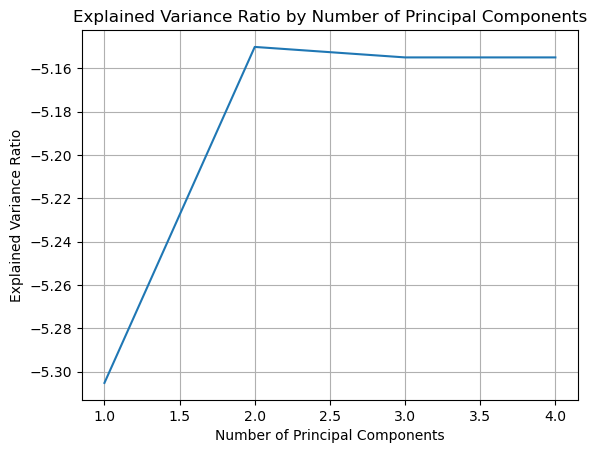

In [10]:
# Extract the values of n_components and corresponding explained variance ratios from the grid
n_components = [params['n_components'] for params in grid.cv_results_['params']]
explained_variances = grid.cv_results_['mean_test_score']

# Create a line plot of the explained variance ratio by n_components
plt.plot(n_components, explained_variances)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid(True)
plt.show()

The output of -5.150173504052676 is the mean cross-validated score obtained during the grid search. In this case, we are using the mean test score as the scoring metric, which is equivalent to the mean of the explained variance ratio across all cross-validation folds.<br><br>

The negative value of the mean test score may seem confusing at first, but it is a result of the way that the GridSearchCV function calculates the score. When using GridSearchCV with unsupervised learning methods like PCA, we typically use a negative score function, which means that the function to be minimized is the negative of the score function. This is because GridSearchCV is designed to maximize the score function, but in the case of unsupervised learning, we want to maximize the explained variance ratio, which is a measure of how much variance in the data is explained by the principal components. However, the GridSearchCV function is designed to minimize the score function, so we need to use the negative of the explained variance ratio as the score function.<br><br>

In summary, the negative value of the mean test score is simply the negative of the mean explained variance ratio across all cross-validation folds, and it is used in the GridSearchCV function to select the optimal value of n_components that maximizes the explained variance ratio.

Printing out the result of the grid search to better understand the result.

In [11]:
print(grid)
print("------------------------------------")
print(grid.cv_results_)
print("------------------------------------")
print(grid.best_params_)
print("------------------------------------")
print(grid.best_estimator_)
print("------------------------------------")
print(grid.scorer_)
print("------------------------------------")
print(grid.n_splits_)

GridSearchCV(estimator=PCA(), param_grid={'n_components': [1, 2, 3, 4]})
------------------------------------
{'mean_fit_time': array([0.00030265, 0.00050335, 0.00020223, 0.00019822]), 'std_fit_time': array([0.00040315, 0.00044964, 0.00024768, 0.00039644]), 'mean_score_time': array([0.00028701, 0.        , 0.00020103, 0.00020094]), 'std_score_time': array([0.00057402, 0.        , 0.00040207, 0.00040188]), 'param_n_components': masked_array(data=[1, 2, 3, 4],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_components': 1}, {'n_components': 2}, {'n_components': 3}, {'n_components': 4}], 'split0_test_score': array([-6.13425334, -6.83957645, -6.84207408, -6.84207408]), 'split1_test_score': array([-4.581845  , -4.37323477, -4.53087669, -4.53087669]), 'split2_test_score': array([-5.17061161, -4.68750445, -4.55205987, -4.55205987]), 'split3_test_score': array([-5.57234896, -5.24581255, -5.30905561, -5.30905561]), 'split4_test_sc

cv_results_ is hard to understand without formatting, a simple way to make it readable is to convert it into a dataframe:

In [12]:
# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Print the DataFrame
print(results_df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000303      0.000403         0.000287        0.000574   
1       0.000503      0.000450         0.000000        0.000000   
2       0.000202      0.000248         0.000201        0.000402   
3       0.000198      0.000396         0.000201        0.000402   

  param_n_components               params  split0_test_score  \
0                  1  {'n_components': 1}          -6.134253   
1                  2  {'n_components': 2}          -6.839576   
2                  3  {'n_components': 3}          -6.842074   
3                  4  {'n_components': 4}          -6.842074   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -4.581845          -5.170612          -5.572349          -5.066671   
1          -4.373235          -4.687504          -5.245813          -4.604739   
2          -4.530877          -4.552060          -5.309056          -4.540992   
3          -4.53087

The GridSearchCV function performs k-fold cross-validation by default, which means that it splits the data into k subsets (or "folds"), trains the model on k-1 of the subsets, and evaluates the performance of the model on the remaining subset. This process is repeated k times, with a different subset used for evaluation each time, so that each subset is used exactly once for evaluation.
<br><br>
In the case of the USArrests dataset, we used the default value of cv=5, which means that the data was split into 5 subsets, or "folds". The GridSearchCV function then fits a separate PCA model for each combination of hyperparameters, and evaluates the model's performance using cross-validation. The result is a mean score and standard deviation of the score across all k folds for each combination of hyperparameters, which is what is reported in the cv_results_ attribute.
<br><br>
In other words, each row of the cv_results_ attribute represents the results of a separate cross-validation run for a particular combination of hyperparameters, and the mean and standard deviation of the score across all cross-validation runs is reported for each combination of hyperparameters.

###### Method B: Elbow method
For this, we need to compute the explained variance for each principal component and plot it against the number of components

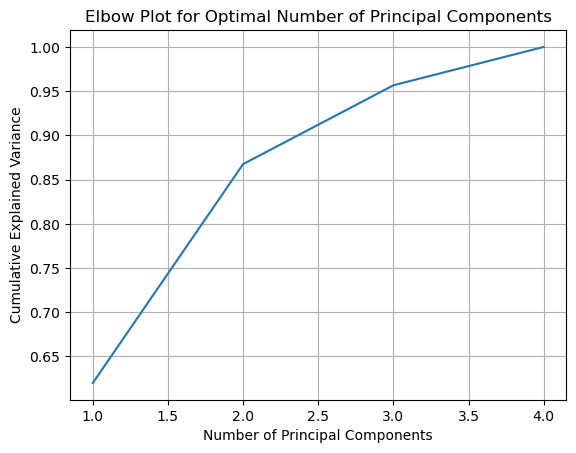

In [13]:
# Fit PCA to the standardized data
pca = PCA().fit(arrests_df_scaled)

# Plot the cumulative explained variance for each component
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for Optimal Number of Principal Components')
plt.grid(True)
plt.show()

We can see that the cumulative explained variance increases rapidly up to 2 components and then starts to level off sharply after 3. So, we can choose 2 or 3 as the optimal number of components to use.

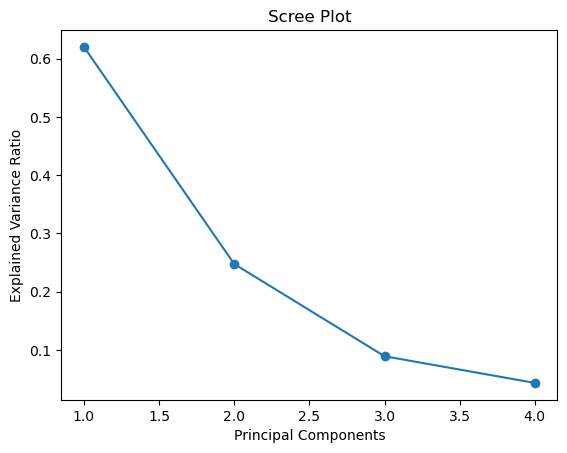

In [14]:
# Scree plot
pca = PCA().fit(arrests_df_scaled)
plt.figure()
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

Printing out the explained and cummulative variance scores for each PCs to better understand the result:

In [15]:
# Get the cumulative explained variance for each principal component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Print out the explained variance and cumulative explained variance for each principal component
for i in range(len(explained_variances)):
    print(f"PC{i+1} explained variance: {explained_var[i]*100:.2f}%")
    print(f"Cumulative explained variance up to PC{i+1}: {cumulative_var[i]*100:.2f}%\n")

PC1 explained variance: 62.01%
Cumulative explained variance up to PC1: 62.01%

PC2 explained variance: 24.74%
Cumulative explained variance up to PC2: 86.75%

PC3 explained variance: 8.91%
Cumulative explained variance up to PC3: 95.66%

PC4 explained variance: 4.34%
Cumulative explained variance up to PC4: 100.00%



It can be seen, that the first PC explains 62% of the total variance, the second explains 24.74%, and these two explain 86.75% in total - and all four components together explain 100% of the total variance.

##### Eigen-vector analysis

 Lets see which variables are most strongly correlated with each component by having a look at the eigen-vectors.

In [16]:
# Compute the eigen-vectors of the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a dataframe to display the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['Murder', 'Assault', 'UrbanPop', 'Rape'])
print(loadings_df)

               PC1       PC2       PC3       PC4
Murder    0.852545  0.420259 -0.205829  0.273115
Assault   0.927768  0.188920 -0.161745 -0.312735
UrbanPop  0.442565 -0.877144 -0.228016  0.056319
Rape      0.864528 -0.168150  0.493277  0.037451


We can see that Murder, Assault, and Rape are strongly correlated with the first component, while UrbanPop and Rape are strongly correlated with the second component.

By the eblow plot I would say to use 3 PCs as they together explain over 95% of the total variance, but we have seen from the grid search actually 2 PCs are the optimal number, and the loadings of the eigen vectors also show disctinc correlations for the first 2 PCs - the third is hard to explain away. The first 2 PCs also explains 86% of the total variance - and anything over 80% is considered an acceptance threshold, so for the purpose of this analysis I choose 2 principal components.

Now that we have determined that with the current feature space 2 principal componens are the best, lets use then n_components=2 param for PCA

After fitting the PCA object to the scaled data, we can examine the components_ attribute to see the eigenvectors of the principal components. This can give us insight into which variables are most strongly associated with each principal component. For example:

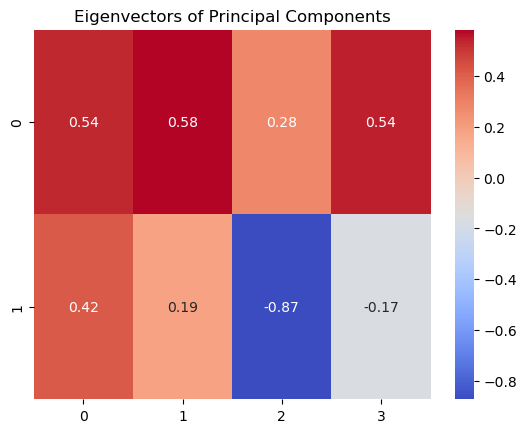

In [17]:
# Fit PCA to the scaled data
pca = PCA(n_components=2)
pca.fit(arrests_df_scaled)

# Plot the eigenvectors as a heatmap
sns.heatmap(pca.components_, cmap='coolwarm', annot=True)
plt.title('Eigenvectors of Principal Components')
plt.show()

Transposing the heatmap and addig names to the variables to better understand the principal components.

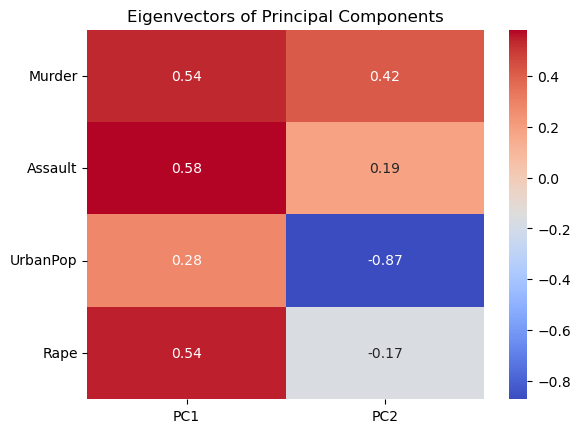

In [18]:
# Create a DataFrame with the eigenvectors as columns and feature names as index
eigenvectors_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=arrests_df.columns[:])

# Plot the eigenvectors as a heatmap
sns.heatmap(eigenvectors_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.yticks(rotation=0)
plt.title('Eigenvectors of Principal Components')
plt.show()

We can see that Murder and Assault are strongly correlated with the first component, while UrbanPop and Rape are strongly correlated with the second component.

##### Eigen-vector analysis on the dataset

In [19]:
# Compute the covariance matrix
cov_mat = np.cov(arrests_df.T)

# Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort the eigenvalues in descending order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

# Print the eigenvalues and eigenvectors
print("Eigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)

Eigenvalues:
 [7.01111485e+03 2.01992366e+02 4.21126508e+01 6.16424618e+00]

Eigenvectors:
 [[ 0.04170432  0.04482166  0.07989066 -0.99492173]
 [ 0.99522128  0.05876003 -0.06756974  0.0389383 ]
 [ 0.04633575 -0.97685748 -0.20054629 -0.05816914]
 [ 0.0751555  -0.20071807  0.97408059  0.07232502]]


In this implementation I compute the covariance matrix using NumPy's cov() function, and compute the eigenvectors and eigenvalues using NumPy's linalg.eig() function.
<br><br>
Next, I sort the eigenvalues in descending order and rearrange the eigenvectors accordingly. Finally, I print the eigenvalues and eigenvectors.
<br><br>
I this case I don't scale the data before computing the covariance matrix. Scaling the data can sometimes be helpful in improving the accuracy of the analysis, but it depends on the dataset and the specific analysis being performed.

In eigenvalue analysis, we are interested in decomposing a matrix into its eigenvectors and eigenvalues.
<br><br>
The eigenvalues tell us how much variance in the data is explained by each eigenvector. Specifically, the eigenvalues are the squared lengths of the eigenvectors, and they are ordered from highest to lowest. In the printout, the first eigenvalue is 7011.11, the second is 201.99, the third is 42.11, and the fourth is 6.16. This means that the first eigenvector explains the most variance in the data, followed by the second, third, and fourth.
<br><br>
The eigenvectors themselves represent the direction of the highest variance in the data. They are ordered according to the eigenvalues, so the first eigenvector corresponds to the first eigenvalue, the second eigenvector corresponds to the second eigenvalue, and so on. 
<br><br>
The first eigenvector [0.0417, 0.9952, 0.0463, 0.0752] has large positive value for the "Assault" variable, and smaller positive values for the rest. This suggests that the first principal component is mainly related to crime rate, with higher values indicating higher crime rates.
<br><br>
The second eigenvector [0.0448, 0.0588, -0.9769, -0.2007] has a large negative value for the "UrbanPop" variable, and smaller, but still large negative value for "Rape". This suggests that the second principal component is mainly related to urban population, where sexual assault is correlated with population density.
<br><br>
The third eigenvector [0.0799, -0.0676, -0.2005, 0.9741] has a large positive value for the "Rape" variable, and a smaller negative value for "UrbanPop". This suggests that the third principal component is mainly related to the rape rate, with higher values indicating higher rape rates - and also seems to be related tot he second PC - which also shows we only need to concentrate on the first two PCs if we want uncorrelated PCs.
<br><br>
The fourth eigenvector [-0.9949, 0.0389, -0.0582, 0.0723] has a large negative value for the "Murder" variable, and small values for the other variables. This suggests that the fourth principal component is mainly related to the murder rate, with higher values indicating higher murder rates.

##### PCA Biplot

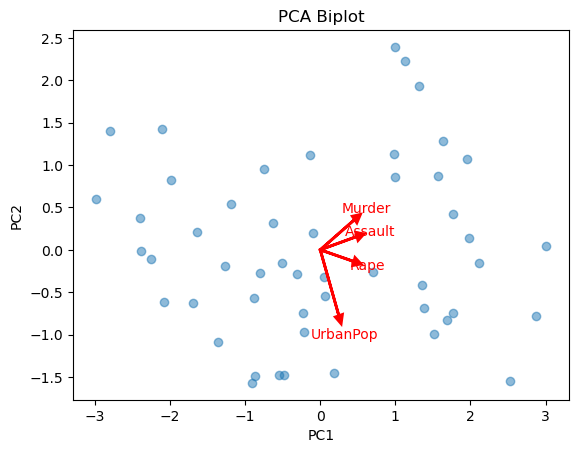

In [20]:
# Fit PCA to the scaled data
pca = PCA(n_components=2)
pca.fit(arrests_df_scaled)

# Create a DataFrame with the eigenvectors as columns and feature names as index
eigenvectors_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=arrests_df.columns[:])

# Create a scatter plot of the scores on the first two principal components
plt.scatter(pca.transform(arrests_df_scaled)[:, 0], pca.transform(arrests_df_scaled)[:, 1], alpha=0.5)

# Add variable vectors to the plot
for i, feature in enumerate(eigenvectors_df.index):
    plt.arrow(0, 0, eigenvectors_df.iloc[i, 0], eigenvectors_df.iloc[i, 1], head_width=0.1, head_length=0.1, linewidth=2, length_includes_head=True, color='r')
    plt.text(eigenvectors_df.iloc[i, 0]*1.15, eigenvectors_df.iloc[i, 1]*1.15, feature, color='r', ha='center', va='center')

# Add axis labels and a title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')

# Show the plot
plt.show()

One approach in interpreting the biplot is to focus on the areas of the plot where there are clusters of points or where there is a clear pattern in the direction of the points. This can help to identify groups of observations that have similar characteristics, as well as variables that are strongly associated with those characteristics.<br><br>
However the datapoints seem to be spreading evenly in the biplot. It may indicate that there are no clear patterns or relationships among the variables and the observations. This can happen when the variables have similar weights on both principal components, or when there are complex interactions or nonlinear relationships among the variables.<br><br>
In such cases, it may be useful to examine the principal component loadings to see which variables are contributing the most to each principal component. This can give us an indication of which variables are most important in explaining the variability in the data, and may help us identify areas where further analysis or data collection is needed.<br><br>
Another approach is to try different combinations of variables or data transformations to see if we can find a clearer pattern in the data. For example, we could try adding or removing variables, or transforming the variables to see if that changes the pattern of the data points in the biplot. Additionally, we could try clustering the observations using a different algorithm or distance metric to see if that reveals any patterns or relationships among the data points.

Sometimes the data may not contain enough information to reveal clear patterns or relationships among the variables and the observations. In such cases, it may be necessary to collect additional data or use more sophisticated analysis techniques to extract meaningful insights.
<br><br>
It's also important to keep in mind that the absence of a clear pattern in the data does not necessarily mean that there is no underlying structure or relationships. It may simply mean that the structure is complex or difficult to detect using the available data and analysis techniques.

Clustering could be a good next step to explore the data further. Clustering techniques can group similar observations together based on their distance or similarity in the feature space, which can help identify patterns or relationships among the data points.
<br><br>
There are many clustering techniques available, ranging from simple methods like k-means clustering to more complex methods like hierarchical clustering or density-based clustering. We could try applying a few different clustering techniques to see which ones work best for the data and provide the most meaningful insights.
<br><br>
When interpreting the results of clustering, it's important to examine the characteristics of the clusters and the features that distinguish them. For example, we could look at the average values of each feature for each cluster, or examine the principal components or other derived features to see which ones contribute the most to cluster separation.
<br><br>
It's also important to keep in mind that clustering is an exploratory technique and the results may be sensitive to the choice of distance metric, clustering algorithm, and other parameters. Therefore, it's often a good idea to try multiple methods and compare the results to gain a more comprehensive understanding of the data.

Now that we have decided we want to use 2 principal components, we can transfor our data accordingly and create a dataframe using 2 PCs:

In [21]:
pca = PCA(n_components=2)
pca.fit(arrests_df_scaled)
df_pca = pca.transform(arrests_df_scaled)

##### K-Means Clustering
K-means is a simple and popular clustering algorithm that assigns each observation to the cluster with the nearest mean, based on a distance metric such as Euclidean distance. I will use this clustering technique to explore the dataset further and decide on the number of clusters I should target (as from the biplot above I cannot see clear clusters).

Visualizing the elbow-curve to decide on the optimal number of clusters between 1 and 10:

C:\Users\longs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


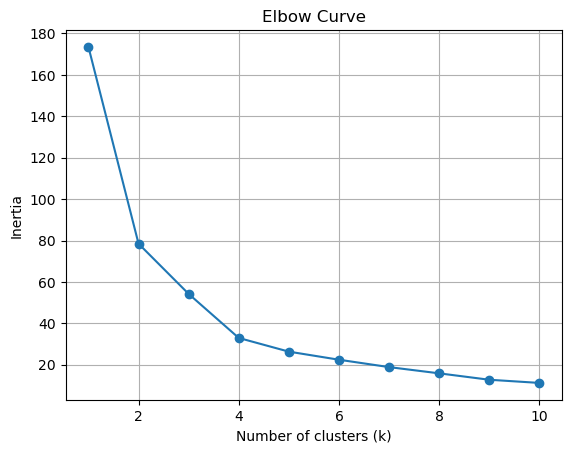

In [22]:
from sklearn.cluster import KMeans

# Fit KMeans clustering with different values of k
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

The above plot shows the optimal number as 4. Lets see what the Silhouette method suggests:

Silhouettte method:

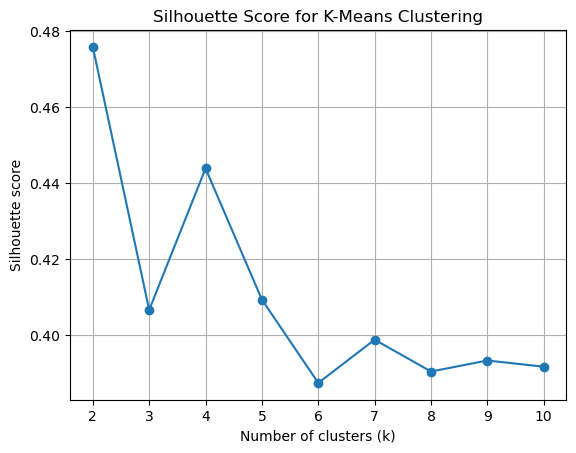

In [23]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for K-Means Clustering')
plt.grid(True)
plt.show()

The Silhouette method show a strong value for 2 clusters, a drop at 3 and a realtively high rise at 4, and and any higher number of clusters are definitely no factor. We have to decide if 2 of 4 clusters give us more value. The Silhouette-plot can provide additional analysis - for completeness and to see how the plots vary with the number of clusters, I plot cluster numbers 2-5:

In [24]:
# checking if yellowbrick installed
!pip install yellowbrick

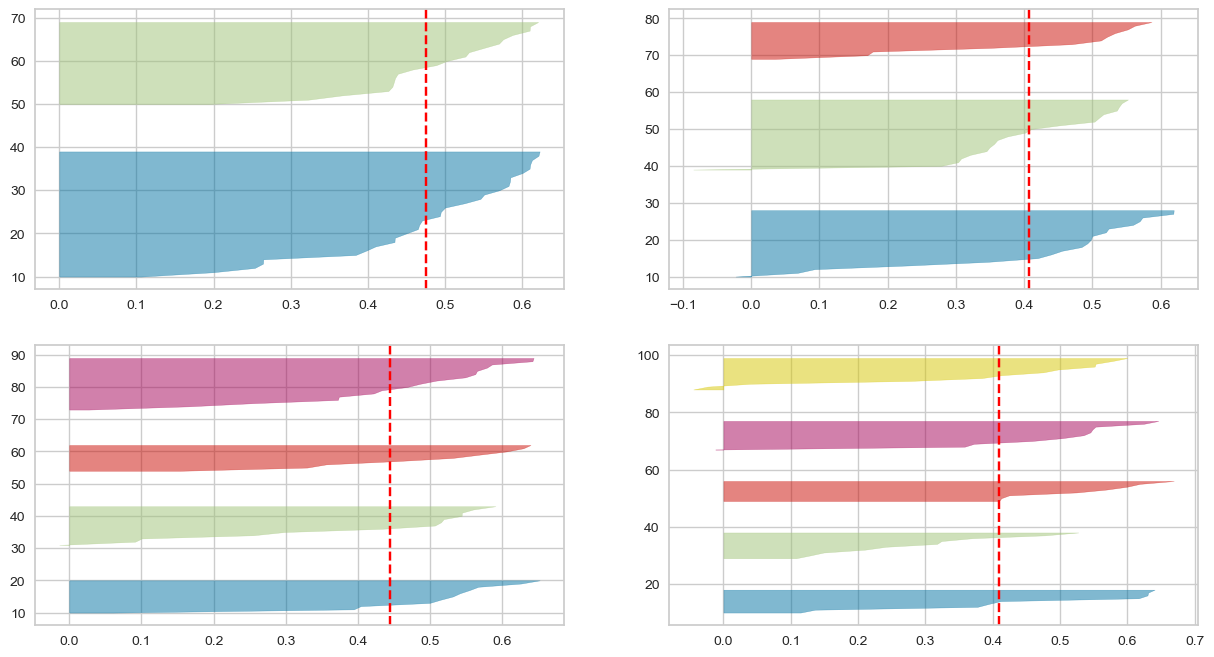

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca)

# reference page: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

3 and 5 clusters show lots of negative values and hoghly differ in thickness - this shows that data belonging to a cluster might be wrong/incorrect. 2 and 4 clusters show better results.

We can also use scatter plots to visualize the clusters:

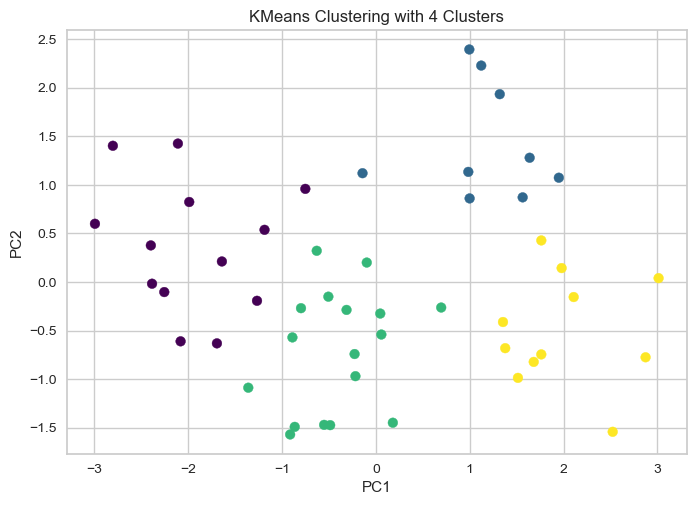

In [26]:
# Fit KMeans to the PCA-transformed data with 2 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca[:, :2])

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters on a scatter plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering with 4 Clusters')
plt.show()

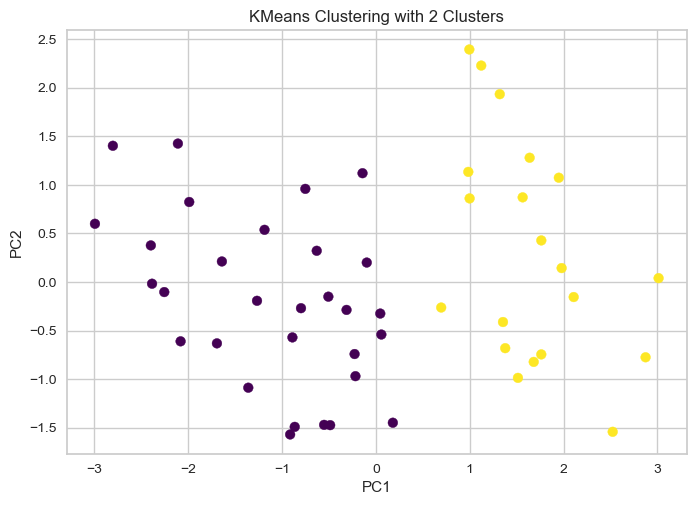

In [27]:
# Fit KMeans to the PCA-transformed data with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_pca[:, :2])

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters on a scatter plot
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering with 2 Clusters')
plt.show()

From all the above I would say for K-Means clustering the optimal number of clusters is 4 - with 2 we are left with two large groupings, but the plot with 4 clusters shows that these large groupings can be divided further -  and then we seen that 3 clusters have incorrect data assignments. Again these clusters are not obviously showing at first sight, so additional analysis is advisable.

##### Agglomerative Clustering

I chose Agglomerative Clustering as the second clustering technique for the following reasons:
<br><br>
Diverse methods: Agglomerative Clustering is a hierarchical clustering method that offers a different approach to clustering compared to K-Means, which is a centroid-based method. By using these two distinct techniques, we can gain a more comprehensive understanding of the patterns within your data.
<br><br>
Interpretability: Hierarchical clustering techniques like Agglomerative Clustering create a dendrogram, a tree-like structure that can be visualized to understand the relationships between clusters and their merging process. This can help you understand the structure of your data at different levels of granularity and make better decisions about the number of clusters to choose.
<br><br>
Flexibility in distance metrics: Agglomerative Clustering allows us to choose from different linkage methods (such as single, complete, average, and Ward's method) and distance metrics (e.g., Euclidean, Manhattan, cosine). This flexibility can help us find a clustering technique that best fits our data's specific characteristics.
<br><br>
Robustness: Agglomerative Clustering can sometimes produce more stable and robust results compared to K-Means, as it is less sensitive to the initial conditions (such as the random selection of initial centroids in K-Means). This can lead to more consistent results when dealing with complex datasets.
<br><br>
By using both K-Means and Agglomerative Clustering, we can compare the results from two different clustering approaches and gain more insights into your data. It's important to remember that the choice of clustering techniques should depend on the nature of the data, the problem we are trying to solve, and any domain knowledge we have about the dataset.

During the analysis with K-Means clustering we achieved a good picture of the information domain of the dataset - 2 principal componens describe over 80% of the variance, and 4 clusters seem to be optimal. We also can see what the Silhouette score shows with Agglomerative clustering.

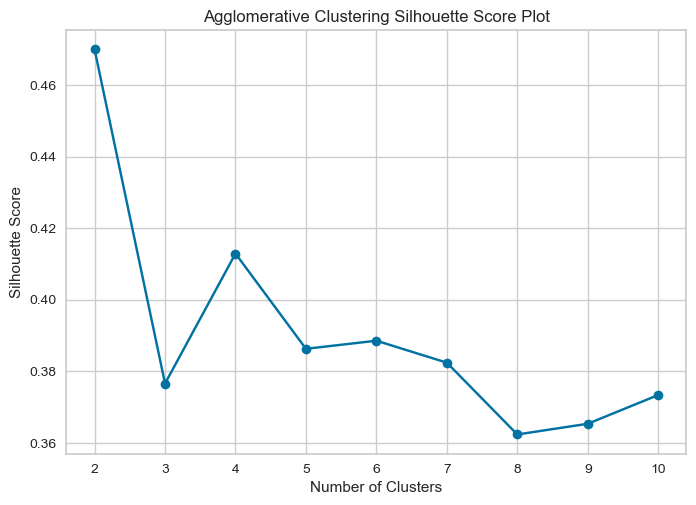

In [28]:
from sklearn.cluster import AgglomerativeClustering

# Determine optimal number of clusters for Agglomerative Clustering
k_values = range(2, 11)
sil_scores_agg = []
for k in k_values:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_clustering.fit(df_pca)
    sil_scores_agg.append(silhouette_score(df_pca, agg_clustering.labels_))

# Silhouette score plot
plt.figure()
plt.plot(k_values, sil_scores_agg, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering Silhouette Score Plot")
plt.show()


Again we can see a spike with 4 clusters - and 2 clusters have the highest score.

In [29]:
# checking if scipy installed
!pip install scipy

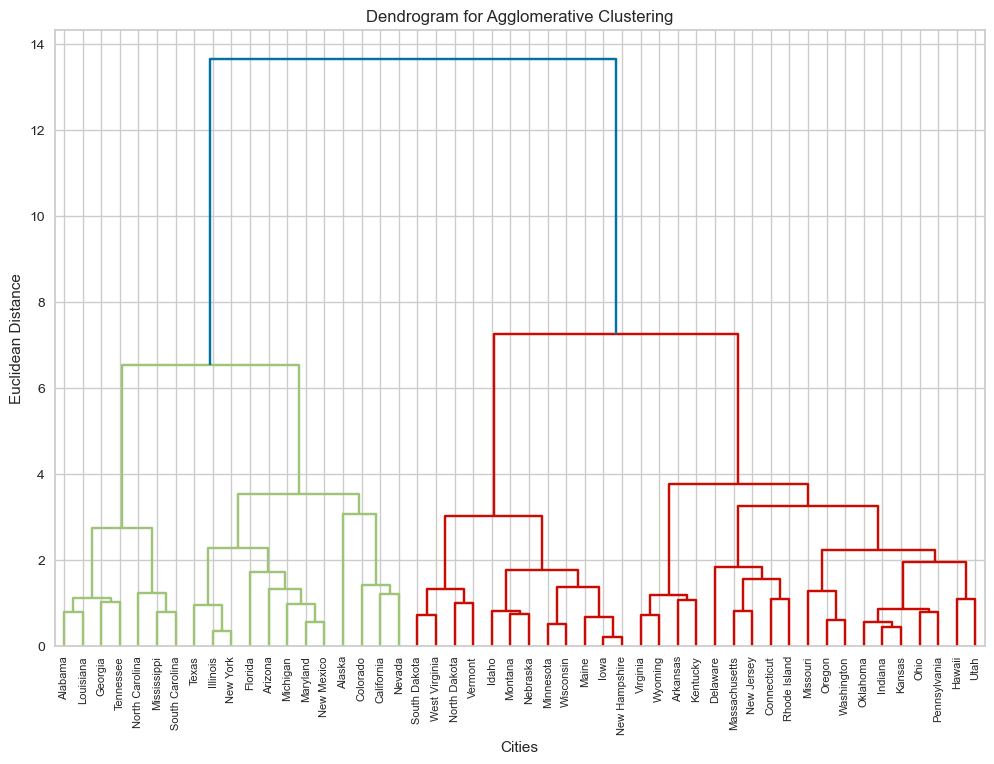

In [30]:
import scipy.cluster.hierarchy as sch

# Create a linkage matrix using the Ward's method
linkage_matrix = sch.linkage(arrests_df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=arrests_df.index.values, leaf_rotation=90)
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

In the dendogram above the x-axis contains the city names, and the y-axis represents the Euclidean distance between the clusters.
<br><br>
I would say there is a stong argument for four clusters looking at the plot - two are definitely not giving a good resolution, 3 are hard to explain away, anything above 4 are just too detailed.

Applying 4 clusters to both methods and anaylising the statistic printouts:

In [31]:
# Apply K-Means clustering
principal_components = df_pca
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(principal_components)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clusters = agg_clustering.fit_predict(principal_components)

# Add cluster labels to the original DataFrame
arrests_df['KMeans_Cluster'] = kmeans_clusters
arrests_df['Agglomerative_Cluster'] = agg_clusters

# Analyze the clusters
kmeans_cluster_stats = arrests_df.groupby('KMeans_Cluster')[features].mean()
agg_cluster_stats = arrests_df.groupby('Agglomerative_Cluster')[features].mean()

print("K-Means Cluster Statistics:")
print(kmeans_cluster_stats)
print("\nAgglomerative Clustering Statistics:")
print(agg_cluster_stats)

K-Means Cluster Statistics:
                   Murder     Assault   UrbanPop       Rape
KMeans_Cluster                                             
0               11.054545  264.090909  79.090909  32.618182
1                3.600000   78.538462  52.076923  12.176923
2               13.500000  245.777778  53.111111  23.977778
3                5.852941  141.176471  73.647059  19.335294

Agglomerative Clustering Statistics:
                          Murder     Assault   UrbanPop       Rape
Agglomerative_Cluster                                             
0                       6.352632  142.000000  70.000000  19.463158
1                      11.054545  264.090909  79.090909  32.618182
2                       2.866667   76.083333  54.083333  11.391667
3                      14.087500  252.750000  53.500000  24.537500


##### Clustering statistics analysis:

Received printout was:<br>
K-Means Cluster Statistics:
<table>
    <tr>
        <th>KMeans_Cluster</th>1
        <th>Murder</th>
        <th>Assault</th>
        <th>UrbanPop</th>
        <th>Rape</th>
    </tr>
    <tr>
        <td>0</td>
        <td>11.054545</td>
        <td>264.090909</td>
        <td>79.090909</td>
        <td>32.618182</td>
    </tr>
    <tr>
        <td>1</td>
        <td>3.600000</td>
        <td>78.538462</td>
        <td>52.076923</td>
        <td>12.176923</td>
    </tr>
    <tr>
        <td>2</td>
        <td>13.500000</td>
        <td>243.625000</td>
        <td>53.111111</td>
        <td>23.977778</td>
    </tr>
    <tr>
        <td>3</td>
        <td>5.852941</td>
        <td>141.176471</td>
        <td>73.647059</td>
        <td>19.335294</td>
    </tr>
</table>

Agglomerative Clustering Statistics:
<table>
    <tr>
        <th>Agglomerative_Cluster</th>
        <th>Murder</th>
        <th>Assault</th>
        <th>UrbanPop</th>
        <th>Rape</th>
    </tr>
    <tr>
        <td>0</td>
        <td>6.352632</td>
        <td>142.000000</td>
        <td>70.000000</td>
        <td>19.463158</td>
    </tr>
    <tr>
        <td>1</td>
        <td>11.054545</td>
        <td>264.090909</td>
        <td>79.090909</td>
        <td>32.618182</td>
    </tr>
    <tr>
        <td>2</td>
        <td>2.866667</td>
        <td>76.083333</td>
        <td>54.083333</td>
        <td>11.391667</td>
    </tr>
    <tr>
        <td>3</td>
        <td>14.087500</td>
        <td>252.750000</td>
        <td>53.500000</td>
        <td>24.537500</td>
    </tr>
</table>
<br><br>
Based on the output statistics for K-Means and Agglomerative Clustering above, we can observe the following patterns within each cluster:
<br><br>
<b><i>K-Means Cluster Statistics:</i></b>
<br>
Cluster 0:
<br>
This cluster have high murder rates, very high assault rates, high urban population percentages, and high rape rates. Cities in this cluster appears to represent areas with high levels of crime across all categories and a high urban population.
<br>
Cluster 1:
<br>
This cluster has the lowest murder rates, low assault rates, low urban population percentages, and the lowest rape rates. Cities in this cluster can be considered relatively safe, with lower levels of crime and a smaller urban population.
<br>
Cluster 2:
<br>
This cluster have the highest murder rates, very high assault rates, low urban population percentages, and moderately high rape rates. Cities in this cluster seems to represent areas with high criminal activity, especially in terms of murder and assault, but with a lower urban population.
<br>
Cluster 3:
<br>
This cluster has moderate murder rates, high assault rates, high urban population percentages, and moderate rape rates. Cities in this cluster may be characterized by a relatively high level of criminal activity but with a larger urban population.
<br><br>
<b><i>Agglomerative Clustering Statistics:</i></b>
<br>
Cluster 0:
<br>
This cluster have moderate murder rates, high assault rates, high urban population percentages, and moderate rape rates. Similar to K-Means Cluster 3, cities in this cluster may be characterized by a relatively high level of criminal activity but with a larger urban population.
<br>
Cluster 1:
<br>
This cluster has high murder rates, very high assault rates, high urban population percentages, and high rape rates, which is similar to K-Means Cluster 0. Cities in this cluster seem to experience high levels of crime across all categories and have a high urban population.
<br>
Cluster 2:
<br>
This cluster has the lowest murder rates, low assault rates, low urban population percentages, and the lowest rape rates, similar to K-Means Cluster 1. Cities in this cluster can be considered relatively safe, with lower levels of crime and a smaller urban population.
<br>
Cluster 3:
<br>
This cluster have the highest murder rates, very high assault rates, low urban population percentages, and moderately high rape rates, similar to K-Means Cluster 2. Cities in this cluster seems to represent areas with high criminal activity, especially in terms of murder and assault, but with a lower urban population.
<br><br>
In summary, both clustering techniques have generated clusters with similar characteristics, and the main differences between the clusters seem to be related to the levels of crime and urban population percentages.

In [32]:
# Create a DataFrame with principal components

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['City'] = arrests_df.index
principal_df['KMeans_Cluster'] = kmeans_clusters
principal_df['Agglomerative_Cluster'] = agg_clusters

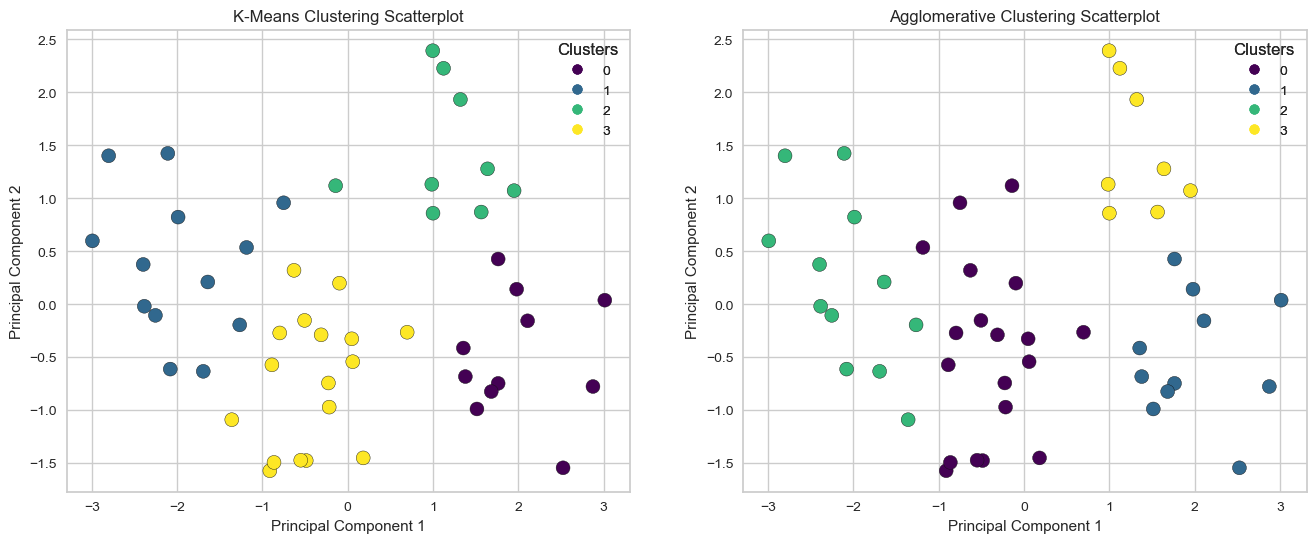

In [37]:
# create the scatterplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatterplot for K-Means Clustering
scatter1 = ax1.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['KMeans_Cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')
ax1.set_title('K-Means Clustering Scatterplot')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
legend1 = ax1.legend(*scatter1.legend_elements(), title='Clusters')
ax1.add_artist(legend1)

# Scatterplot for Agglomerative Clustering
scatter2 = ax2.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['Agglomerative_Cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')
ax2.set_title('Agglomerative Clustering Scatterplot')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
legend2 = ax2.legend(*scatter2.legend_elements(), title='Clusters')
ax2.add_artist(legend2)

plt.savefig('images/clustering_scatterplots.png')  # Save the plot as an image file
plt.show()

The clusters are slightly different and as we can see K-Means Cluster 0 corresponds to Agglomerative Cluster 1, 1 to 2, 2 to 3, and 3 to 0 (more or less).
<br><br>
I would say Agglomerative Clustering have produced a better division of datapoints.

Finally a printout of cities belonging to the clusters in both K-Means and Agglomerative clustering:

In [35]:
n_clusters = 4
kmeans_clusters_description = [
    "high levels of crime across all categories and a high urban population",
    "high levels of crime across all categories and have a high urban population",
    "high criminal activity, especially in terms of murder and assault, but with a lower urban population",
    "relatively high level of criminal activity but with a larger urban population"
]

# Group the cities by cluster and print them out
for idx in range(n_clusters):
    cities_in_cluster = arrests_df[arrests_df['KMeans_Cluster'] == idx].index.values
    print(f"Cities in K-Means Cluster {idx} that experience {kmeans_clusters_description[idx]}:")
    print(", ".join(cities_in_cluster))
    print()

Cities in K-Means Cluster 0 that experience high levels of crime across all categories and a high urban population:
Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cities in K-Means Cluster 1 that experience high levels of crime across all categories and have a high urban population:
Idaho, Iowa, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin

Cities in K-Means Cluster 2 that experience high criminal activity, especially in terms of murder and assault, but with a lower urban population:
Alabama, Alaska, Arkansas, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee

Cities in K-Means Cluster 3 that experience relatively high level of criminal activity but with a larger urban population:
Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, Missouri, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Vir

In [36]:
n_clusters = 4
agglo_clusters_description = [
    "relatively high level of criminal activity but with a larger urban population",
    "high levels of crime across all categories and have a high urban population",
    "lower levels of crime and a smaller urban population",
    "high criminal activity, especially in terms of murder and assault, but with a lower urban population"
]

# Group the cities by cluster and print them out
for idx in range(n_clusters):
    cities_in_cluster = arrests_df[arrests_df['Agglomerative_Cluster'] == idx].index.values
    print(f"Cities in Agglomerative Cluster {idx} that experience {agglo_clusters_description[idx]}:")
    print(", ".join(cities_in_cluster))
    print()

Cities in Agglomerative Cluster 0 that experience relatively high level of criminal activity but with a larger urban population:
Arkansas, Delaware, Hawaii, Indiana, Kansas, Kentucky, Massachusetts, Missouri, Montana, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming

Cities in Agglomerative Cluster 1 that experience high levels of crime across all categories and have a high urban population:
Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas

Cities in Agglomerative Cluster 2 that experience lower levels of crime and a smaller urban population:
Connecticut, Idaho, Iowa, Maine, Minnesota, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin

Cities in Agglomerative Cluster 3 that experience high criminal activity, especially in terms of murder and assault, but with a lower urban population:
Alabama, Alaska, Georgia, Louisiana, Mississippi, North Car